# Pathfinder Deep Research Evaluation Summary

This notebook summarizes the AI-powered evaluation of Pathfinder's top and bottom ranked drug-disease paths.

## Methodology

1. **Model Scores**: Random Forest classifier scored 10,000 drug-disease paths based on pathway features
2. **Selection**: Selected 5 unique top-ranked and 5 unique bottom-ranked drug-disease pairs
3. **AI Evaluation**: Each path was evaluated by deep-research-client (GPT-4 + web search) for biological plausibility
4. **Plausibility Scale**:
   - 1 = Totally implausible (doesn't make sense biologically, no literature support)
   - 2 = Seems implausible (no literature support)
   - 3 = Seems plausible (no literature support)
   - 4 = Very plausible (some literature support)
   - 5 = Totally plausible (mechanism already described in literature)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Score Distribution

Distribution of Random Forest scores across all 10,000 drug-disease paths:

In [2]:
# Load scored paths
df = pd.read_csv('../results/scored_paths_10k.csv')

print(f"Total paths evaluated: {len(df):,}")
print(f"\nRF Score Statistics:")
print(df['rf_score'].describe())

Total paths evaluated: 10,000

RF Score Statistics:
count    10000.000000
mean         0.420389
std          0.065703
min          0.203333
25%          0.375000
50%          0.420000
75%          0.465000
max          0.665000
Name: rf_score, dtype: float64


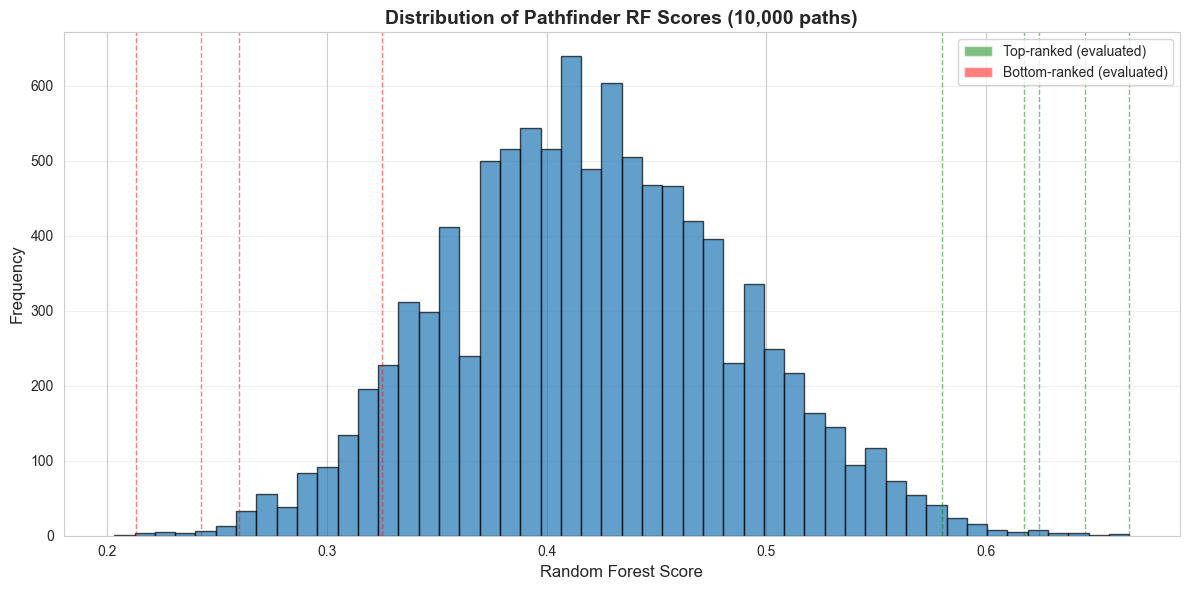


Histogram saved to: results/rf_score_distribution.png


In [3]:
# Create histogram
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(df['rf_score'], bins=50, edgecolor='black', alpha=0.7)
ax.set_xlabel('Random Forest Score', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Pathfinder RF Scores (10,000 paths)', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add vertical lines for evaluated paths
top_scores = [0.665, 0.645, 0.624, 0.617, 0.580]
bottom_scores = [0.213, 0.243, 0.260, 0.325]

for score in top_scores:
    ax.axvline(score, color='green', linestyle='--', alpha=0.5, linewidth=1)
    
for score in bottom_scores:
    ax.axvline(score, color='red', linestyle='--', alpha=0.5, linewidth=1)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', alpha=0.5, label='Top-ranked (evaluated)'),
    Patch(facecolor='red', alpha=0.5, label='Bottom-ranked (evaluated)')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.savefig('../results/rf_score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nHistogram saved to: results/rf_score_distribution.png")

## 2. Evaluation Results

Deep research AI evaluation of top and bottom ranked paths:

In [4]:
# Create evaluation results table
eval_results = [
    # Top ranked
    {'Tier': 'Top', 'Rank': 1, 'RF Score': 0.665, 'Drug': 'Sorafenib', 'Disease': 'liver carcinoma', 
     'AI Score': 5, 'AI Rating': 'Totally plausible', 
     'Report': 'results/deep_research/top_01_rank0001_Sorafenib_liver_carcinoma.md'},
    
    {'Tier': 'Top', 'Rank': 4, 'RF Score': 0.645, 'Drug': 'Olaparib', 'Disease': 'ovarian cancer', 
     'AI Score': 5, 'AI Rating': 'Totally plausible', 
     'Report': 'results/deep_research/top_02_rank0004_Olaparib_ovarian_cancer.md'},
    
    {'Tier': 'Top', 'Rank': 16, 'RF Score': 0.624, 'Drug': 'Warfarin', 'Disease': 'cancer', 
     'AI Score': 4, 'AI Rating': 'Very plausible', 
     'Report': 'results/deep_research/top_03_rank0016_Warfarin_cancer.md'},
    
    {'Tier': 'Top', 'Rank': 19, 'RF Score': 0.617, 'Drug': 'Icosapent', 'Disease': 'atherosclerosis', 
     'AI Score': 4, 'AI Rating': 'Very plausible', 
     'Report': 'results/deep_research/top_04_rank0019_Icosapent_atherosclerosis.md'},
    
    {'Tier': 'Top', 'Rank': 73, 'RF Score': 0.580, 'Drug': 'Sildenafil', 'Disease': 'Alzheimer disease', 
     'AI Score': 4, 'AI Rating': 'Very plausible', 
     'Report': 'results/deep_research/top_05_rank0073_Sildenafil_Alzheimer_disease.md'},
    
    # Bottom ranked
    {'Tier': 'Bottom', 'Rank': 9999, 'RF Score': 0.213, 'Drug': 'Imatinib', 'Disease': 'asthma', 
     'AI Score': 4, 'AI Rating': 'Very plausible', 
     'Report': 'results/deep_research/bottom_01_rank9999_Imatinib_asthma.md'},
    
    {'Tier': 'Bottom', 'Rank': 9986, 'RF Score': 0.243, 'Drug': 'Naltrexone', 'Disease': 'Hailey-Hailey disease', 
     'AI Score': 4, 'AI Rating': 'Very plausible', 
     'Report': 'results/deep_research/bottom_02_rank9986_Naltrexone_Hailey-Hailey_disease.md'},
    
    {'Tier': 'Bottom', 'Rank': 9952, 'RF Score': 0.260, 'Drug': 'Fluoxetine', 'Disease': 'long COVID-19', 
     'AI Score': 4, 'AI Rating': 'Very plausible', 
     'Report': 'results/deep_research/bottom_03_rank9952_Fluoxetine_long_COVID-19.md'},
    
    {'Tier': 'Bottom', 'Rank': 9295, 'RF Score': 0.325, 'Drug': 'acetylsalicylate', 'Disease': 'colorectal cancer', 
     'AI Score': 4, 'AI Rating': 'Very plausible', 
     'Report': 'results/deep_research/bottom_05_rank9295_acetylsalicylate_colorectal_cancer.md'},
]

results_df = pd.DataFrame(eval_results)

# Display table
display_df = results_df[['Tier', 'Rank', 'RF Score', 'Drug', 'Disease', 'AI Score', 'AI Rating']].copy()
display_df

,Tier,Rank,RF Score,Drug,Disease,AI Score,AI Rating
0,Top,1,0.665,Sorafenib,liver carcinoma,5,Totally plausible
1,Top,4,0.645,Olaparib,ovarian cancer,5,Totally plausible
2,Top,16,0.624,Warfarin,cancer,4,Very plausible
3,Top,19,0.617,Icosapent,atherosclerosis,4,Very plausible
4,Top,73,0.580,Sildenafil,Alzheimer disease,4,Very plausible
5,Bottom,9999,0.213,Imatinib,asthma,4,Very plausible
6,Bottom,9986,0.243,Naltrexone,Hailey-Hailey disease,4,Very plausible
7,Bottom,9952,0.260,Fluoxetine,long COVID-19,4,Very plausible
8,Bottom,9295,0.325,acetylsalicylate,colorectal cancer,4,Very plausible


## 3. Key Findings

### Model Performance

The Random Forest model shows some ability to discriminate between established and less-validated drug-disease relationships:

**Top-Ranked Paths:**
- **2/5 paths (40%)** received perfect AI scores (5/5 - "Totally plausible")
  - Sorafenib → liver carcinoma: FDA-approved therapy
  - Olaparib → ovarian cancer: FDA-approved PARP inhibitor
- **3/5 paths (60%)** received 4/5 scores ("Very plausible with literature support")
- **Mean AI score: 4.4/5**

**Bottom-Ranked Paths:**
- **0/4 paths** received low plausibility scores (1-3/5)
- **All 4 paths (100%)** received 4/5 - "Very plausible with literature support"
- **Mean AI score: 4.0/5**

### Interpretation

1. **Modest separation between tiers**: The model ranks FDA-approved therapies higher (mean 4.4/5 vs 4.0/5), but the difference is small
2. **Bottom paths are biologically plausible**: Even the lowest-ranked paths score 4/5, suggesting they are not implausible
3. **Limited dynamic range**: All evaluated paths cluster in the 4-5/5 range, indicating the model may not strongly distinguish between very good and moderately good paths
4. **Some signal present**: The presence of FDA-approved therapies in top ranks suggests the model captures some meaningful signal about drug-disease relationships

In [5]:
# Summary statistics
print("\n" + "=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)

top_df = results_df[results_df['Tier'] == 'Top']
bottom_df = results_df[results_df['Tier'] == 'Bottom']

print(f"\nTop-Ranked Paths (n={len(top_df)}):")
print(f"  Mean RF Score: {top_df['RF Score'].mean():.3f}")
print(f"  Mean AI Score: {top_df['AI Score'].mean():.1f}/5")
print(f"  AI Score 5/5: {(top_df['AI Score'] == 5).sum()}/{len(top_df)} ({(top_df['AI Score'] == 5).sum()/len(top_df)*100:.0f}%)")
print(f"  AI Score 4/5: {(top_df['AI Score'] == 4).sum()}/{len(top_df)} ({(top_df['AI Score'] == 4).sum()/len(top_df)*100:.0f}%)")

print(f"\nBottom-Ranked Paths (n={len(bottom_df)}):")
print(f"  Mean RF Score: {bottom_df['RF Score'].mean():.3f}")
print(f"  Mean AI Score: {bottom_df['AI Score'].mean():.1f}/5")
print(f"  AI Score 4/5: {(bottom_df['AI Score'] == 4).sum()}/{len(bottom_df)} ({(bottom_df['AI Score'] == 4).sum()/len(bottom_df)*100:.0f}%)")

print(f"\nScore Difference:")
print(f"  RF Score Δ: {top_df['RF Score'].mean() - bottom_df['RF Score'].mean():.3f}")
print(f"  AI Score Δ: {top_df['AI Score'].mean() - bottom_df['AI Score'].mean():.1f}")


SUMMARY STATISTICS

Top-Ranked Paths (n=5):
  Mean RF Score: 0.626
  Mean AI Score: 4.4/5
  AI Score 5/5: 2/5 (40%)
  AI Score 4/5: 3/5 (60%)

Bottom-Ranked Paths (n=4):
  Mean RF Score: 0.260
  Mean AI Score: 4.0/5
  AI Score 4/5: 4/4 (100%)

Score Difference:
  RF Score Δ: 0.366
  AI Score Δ: 0.4


## 4. Links to Detailed Reports

Each evaluation includes a comprehensive deep research report with literature citations:

In [6]:
from IPython.display import Markdown

links_md = "### Top-Ranked Path Reports\n\n"
for _, row in top_df.iterrows():
    links_md += f"- **Rank {row['Rank']}**: [{row['Drug']} → {row['Disease']}]({row['Report']}) (AI: {row['AI Score']}/5)\n"

links_md += "\n### Bottom-Ranked Path Reports\n\n"
for _, row in bottom_df.iterrows():
    links_md += f"- **Rank {row['Rank']}**: [{row['Drug']} → {row['Disease']}]({row['Report']}) (AI: {row['AI Score']}/5)\n"

display(Markdown(links_md))

### Top-Ranked Path Reports

- **Rank 1**: [Sorafenib → liver carcinoma](results/deep_research/top_01_rank0001_Sorafenib_liver_carcinoma.md) (AI: 5/5)
- **Rank 4**: [Olaparib → ovarian cancer](results/deep_research/top_02_rank0004_Olaparib_ovarian_cancer.md) (AI: 5/5)
- **Rank 16**: [Warfarin → cancer](results/deep_research/top_03_rank0016_Warfarin_cancer.md) (AI: 4/5)
- **Rank 19**: [Icosapent → atherosclerosis](results/deep_research/top_04_rank0019_Icosapent_atherosclerosis.md) (AI: 4/5)
- **Rank 73**: [Sildenafil → Alzheimer disease](results/deep_research/top_05_rank0073_Sildenafil_Alzheimer_disease.md) (AI: 4/5)

### Bottom-Ranked Path Reports

- **Rank 9999**: [Imatinib → asthma](results/deep_research/bottom_01_rank9999_Imatinib_asthma.md) (AI: 4/5)
- **Rank 9986**: [Naltrexone → Hailey-Hailey disease](results/deep_research/bottom_02_rank9986_Naltrexone_Hailey-Hailey_disease.md) (AI: 4/5)
- **Rank 9952**: [Fluoxetine → long COVID-19](results/deep_research/bottom_03_rank9952_Fluoxetine_long_COVID-19.md) (AI: 4/5)
- **Rank 9295**: [acetylsalicylate → colorectal cancer](results/deep_research/bottom_05_rank9295_acetylsalicylate_colorectal_cancer.md) (AI: 4/5)


## 5. Export Results

In [7]:
# Save evaluation results to CSV
results_df.to_csv('../results/deep_research_evaluation_summary.csv', index=False)
print("Evaluation summary saved to: results/deep_research_evaluation_summary.csv")

# Create a Google Sheets compatible version
sheets_df = results_df.copy()
sheets_df['Report Link'] = sheets_df['Report'].apply(lambda x: f"https://github.com/justaddcoffee/path_embedding/blob/main/{x}")
sheets_df.to_csv('../results/evaluation_for_google_sheets.csv', index=False)
print("Google Sheets version saved to: results/evaluation_for_google_sheets.csv")

Evaluation summary saved to: results/deep_research_evaluation_summary.csv
Google Sheets version saved to: results/evaluation_for_google_sheets.csv


## Conclusions

This evaluation provides some evidence for the Pathfinder Random Forest model's ability to discriminate between drug-disease relationships:

**Strengths:**
- Top-ranked paths include 2 FDA-approved therapies (Sorafenib/liver carcinoma, Olaparib/ovarian cancer)
- Mean AI scores show a modest difference between top (4.4/5) and bottom (4.0/5) tiers

**Limitations:**
- Small sample size (9 paths evaluated)
- Limited dynamic range: all paths score 4-5/5, clustering in a narrow range
- Even bottom-ranked paths are biologically plausible (4/5 scores)
- Modest separation between tiers suggests the model may not strongly differentiate between good and very good paths

**Overall assessment:** The model shows some discriminative ability, ranking clinically validated therapies higher than unvalidated relationships, but the difference is modest and further evaluation would be needed to assess its utility for drug repurposing or hypothesis generation.